In [113]:
##################
# Load libraries #
##################

from get_strava_data import my_data, process_data, get_elevation

import requests

import pandas as pd
import numpy as np

from PIL import Image
import base64

import ast
import polyline

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import IFrame
from folium.features import CustomIcon


import plotly.express as px
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator
raw_symbols = SymbolValidator().values
import streamlit as st


In [13]:
print("folium.__version__",folium.__version__)

folium.__version__ 0.11.0


In [221]:
polylines_df = pd.read_csv('./data/processed_data.csv', usecols=['name', 'distance', 'total_elevation_gain', 'average_speed', 'weighted_average_watts', 'suffer_score', 'year', 'month', 'day', 'type', 'map'])
polylines_df = polylines_df[polylines_df.type == 'Ride'] # We'll only use rides which have a map

ride_names = polylines_df.name


# We'll choose rides by index to avoid duplicate names 
ride_index = 3
decoded = pd.json_normalize(polylines_df[polylines_df.index == ride_index]['map'].apply(ast.literal_eval))['summary_polyline'].apply(polyline.decode).values[0]


In [222]:
decoded

[(37.78761, -122.27535),
 (37.78739, -122.27511),
 (37.78675, -122.2747),
 (37.78652, -122.27445),
 (37.78636, -122.27413),
 (37.78582, -122.27264),
 (37.78566, -122.27234),
 (37.7855, -122.27215),
 (37.78462, -122.2714),
 (37.78429, -122.2712),
 (37.78357, -122.27108),
 (37.7833, -122.2711),
 (37.78319, -122.27102),
 (37.78308, -122.2708),
 (37.78286, -122.27008),
 (37.78273, -122.26981),
 (37.78205, -122.26915),
 (37.78188, -122.26886),
 (37.78178, -122.26852),
 (37.78161, -122.26715),
 (37.7817, -122.2656),
 (37.78167, -122.26546),
 (37.78158, -122.26538),
 (37.78085, -122.26541),
 (37.78066, -122.26533),
 (37.78047, -122.26465),
 (37.78028, -122.26427),
 (37.78005, -122.26396),
 (37.77928, -122.26318),
 (37.77871, -122.26277),
 (37.77835, -122.26304),
 (37.77807, -122.26314),
 (37.77498, -122.26337),
 (37.77458, -122.26333),
 (37.77305, -122.26339),
 (37.77296, -122.26334),
 (37.77287, -122.26256),
 (37.77286, -122.26073),
 (37.77277, -122.25905),
 (37.77189, -122.25704),
 (37.7716

In [223]:
polylines_df

,name,distance,total_elevation_gain,type,map,average_speed,suffer_score,weighted_average_watts,year,month,day
1,Afternoon Ride,18.1,167.3,Ride,"{'id': 'a6962213592', 'summary_polyline': '{ks...",16.8,70.0,153.0,2022,4,10
2,Fun with the kiddos,4.0,7.5,Ride,"{'id': 'a6956840241', 'summary_polyline': 'mus...",6.8,5.0,NaN,2022,4,9
3,Monterey - Butters,20.4,1355.0,Ride,"{'id': 'a6955866591', 'summary_polyline': 'qks...",13.9,137.0,166.0,2022,4,9
5,Hot! Too hot! 🥵,18.3,128.0,Ride,"{'id': 'a6947233958', 'summary_polyline': 'oks...",16.2,126.0,130.0,2022,4,7
7,Windy! 💨,19.3,265.7,Ride,"{'id': 'a6937664224', 'summary_polyline': 'oks...",15.8,128.0,152.0,2022,4,5
...,...,...,...,...,...,...,...,...,...,...,...
718,"06/16/2012 New York, NY",2.4,43.0,Ride,"{'id': 'a11732689', 'summary_polyline': 'okkxF...",10.0,NaN,NaN,2012,6,16
719,"06/03/2012 New York, NY - Tour de Brooklyn",34.8,534.1,Ride,"{'id': 'a11732533', 'summary_polyline': 'gljxF...",9.5,NaN,NaN,2012,6,3
720,"06/02/2012 New York, NY",12.4,283.5,Ride,"{'id': 'a11732479', 'summary_polyline': 'wtlxF...",9.4,NaN,NaN,2012,6,2
721,"05/26/2012 New York, NY",11.9,169.6,Ride,"{'id': 'a11732411', 'summary_polyline': 'spjxF...",9.0,NaN,NaN,2012,5,26


In [266]:

polylines_df['decoded_polyline'] = polylines_df['map'].apply(ast.literal_eval)
polylines_df['decoded_polyline'] = pd.json_normalize(polylines_df['decoded_polyline'])['summary_polyline']
# Dropping row with decoded_polyline = None
polylines_df = polylines_df[polylines_df.decoded_polyline.notnull()]

polylines_df['decoded_polyline'] = polylines_df['decoded_polyline'].apply(polyline.decode)

polylines_df.head()

,name,distance,total_elevation_gain,type,map,average_speed,suffer_score,weighted_average_watts,year,month,day,decoded_polyline
1,Afternoon Ride,18.1,167.3,Ride,"{'id': 'a6962213592', 'summary_polyline': '{ks...",16.8,70.0,153.0,2022,4,10,"[(37.78919, -122.28392), (37.7892, -122.28478)..."
2,Fun with the kiddos,4.0,7.5,Ride,"{'id': 'a6956840241', 'summary_polyline': 'mus...",6.8,5.0,NaN,2022,4,9,"[(37.78761, -122.27535), (37.78739, -122.27511..."
3,Monterey - Butters,20.4,1355.0,Ride,"{'id': 'a6955866591', 'summary_polyline': 'qks...",13.9,137.0,166.0,2022,4,9,"[(37.7876, -122.27535), (37.78727, -122.27502)..."
5,Hot! Too hot! 🥵,18.3,128.0,Ride,"{'id': 'a6947233958', 'summary_polyline': 'oks...",16.2,126.0,130.0,2022,4,7,"[(37.78754, -122.27535), (37.78737, -122.27517..."
7,Windy! 💨,19.3,265.7,Ride,"{'id': 'a6937664224', 'summary_polyline': 'oks...",15.8,128.0,152.0,2022,4,5,"[(37.78757, -122.27536), (37.78648, -122.27439..."


In [ ]:
polylines_df['elevation_profile'] = polylines_df['decoded_polyline'].apply(get_elevation)

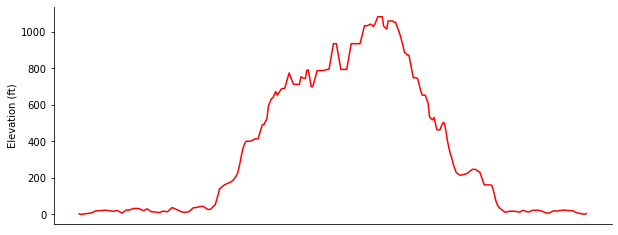

In [6]:
# Adding elevation data from Open Street Map
elevation_profile = [get_elevation(coord[0], coord[1]) for coord in decoded]
elevation_profile_feet = [elevation_profile[i] * 3.28084 for i in range(len(elevation_profile))] # Converting elevation to feet

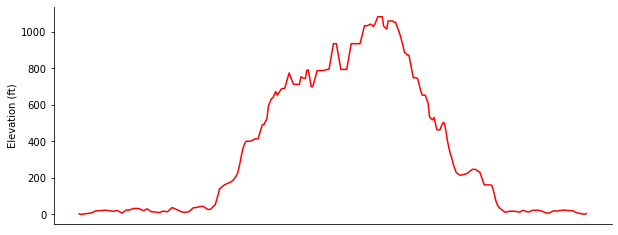

In [11]:
# Plotting elevation data
fig, ax = plt.subplots(figsize=(10, 4))
ax = pd.Series(elevation_profile_feet).rolling(3).mean().plot(
    ax=ax, 
    color='red', 
    legend=False
)
ax.set_ylabel('Elevation (ft)')
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Saving plot
plt.savefig('./data/elevation_profile.png', dpi=300)

In [15]:
# Mapping route with folium

png = './data/elevation_profile.png'

encoded = base64.b64encode(open(png, 'rb').read())



html = '<img src="data:image/png;base64,{}">'.format
# iframe = IFrame(html(), width=632+20, height=420+20)
# popup = folium.Popup(iframe, max_width=2650)

centroid = [
    np.mean([coord[0] for coord in decoded]), 
    np.mean([coord[1] for coord in decoded])
]
my_map = folium.Map(location=centroid, zoom_start=13)
folium.PolyLine(decoded).add_to(my_map)

my_map

In [245]:

lat = [coord[0] for coord in decoded] 
lon = [coord[1] for coord in decoded]


token = MAPBOX_TOKEN = st.secrets['MAPBOX_TOKEN']

fig = go.Figure(go.Scattermapbox(
    mode = "lines",
    lon = lon, lat = lat,
    marker = dict(size = 2, color = "red"),
    line = dict(color = "midnightblue", width = 3),
    # text = '‣',
    textfont=dict(color='#E58606'),
    textposition = 'bottom center',))
fig.update_traces(hovertext='', selector=dict(type='scattermapbox'))
fig.update_layout(
    mapbox = {
        'accesstoken': token,
        'style': "outdoors", 'zoom': 12,
        'center': {'lon': centroid[1], 'lat': centroid[0]}
    },
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    showlegend = False,
    mapbox_style="light")
    

fig.show()

In [271]:
name = polylines_df[polylines_df.index == 3]['name'].values[0]
distance = polylines_df[polylines_df.index == 3]['distance'].values[0]
elev_gain = polylines_df[polylines_df.index == 3]['total_elevation_gain'].values[0]
avg_speed = polylines_df[polylines_df.index == 3]['average_speed'].values[0]
avg_power = polylines_df[polylines_df.index == 3]['weighted_average_watts'].values[0] 
suffer = polylines_df[polylines_df.index == 3]['suffer_score'].values[0]

fig = px.line(elevation_profile_feet, x=range(len(elevation_profile_feet)), y=pd.Series(elevation_profile_feet).rolling(5).mean())
fig.update_layout(
        xaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=False,
            linecolor='rgb(204, 204, 204)',
            linewidth=1,
            ticks='',
            tickfont=dict(
                family='Arial',
                size=12,
                color='rgb(82, 82, 82)',
            ),
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            showline=False,
            gridcolor = 'rgb(235, 236, 240)',
            showticklabels=True,
            title='Elevation (ft)',
            autorange=False,
            range=[0, 2000],
        ),
        autosize=True,
        hovermode="x unified",
        showlegend=False,
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis_title='',
        margin=dict(l=0, r=0, t=0, b=0),
    )
fig.add_annotation(text=f"<b>RIDE STATS</b>--------------------", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.99,
)
fig.add_annotation(text=f"<b>Name</b>: {name}", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.95,
)                    
fig.add_annotation(text=f"<b>Distance</b>: {distance} miles", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.91,
)
fig.add_annotation(text=f"<b>Elevation Gain</b>: {elev_gain} feet", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.87,
)
fig.add_annotation(text=f"<b>Average Speed</b>: {avg_speed} mph", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.83,
)     
fig.add_annotation(text=f"<b>Weighted Power</b>: {avg_power} Watts", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.79,
)
fig.add_annotation(text=f"<b>Suffer Score</b>: {suffer.astype(int)}", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.75,
)  
fig.add_annotation(text="----------------------------------", 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.71,
)


fig.show()

166.0